MachineLeaningCourse vol.7
# ロジスティック回帰

ロジスティック回帰を理解するためには、最初に次ぎのことを考えるとわかりやすいでしょう。
基本的な線形モデルを単純にそのまま使ってクラス確率を推定したとすると、そのときに生じる問題とは何でしょうか。

インスタンスが決定境界から離れれば離れるほど、ある一方のクラスになる確率が高くなるはずです。そして、線形関数$f(x)$の値は決定境界からの距離を与えます。

このことは、ある問題を示しています。$f(x)$は-∞から∞の値を取りますが、確率は０から１の間を取ります。

境界からの距離$f(x)$をどのように確率に変化すべきかという問題を、あるクラスに属する可能性という面で考えていきましょう。

あることが起きる可能性を表すためによく使われている方法の一つはオッズ（odds）です。なにかがおきる__オッズ__は、__それがおきる確率と起こらない確率の比率__です。

オッズは以下の様に定義できます。（この場合、pは正事象の確率を表す）
$$\frac{p}{(1-p)}$$

例えば、何かが起きる確率が８０％だったとすると、そのオッズは80:20あるいは4:1です。
そして線形関数がオッズを与えてくれるなら、ちょっとした計算でそのオッズを確率に変換できます。


もっと詳しい例を見てみましょう。下の図はさまざまな確率に応じたオッズを示しています。

|確率|オッズ|
|:--|:--|
|0.5|50:50または1|
|0.9|90:10または9|
|0.999|999:1または999|
|0.01|1:99または0.101|
|0.001|1:999または0.001001|

これを見ても、まだこれをそのまま決定境界からの距離だと解釈することはできないことが分かります。

境界からの距離は-∞から∞です。しかしこの例からわかるように、オッズの幅は0から∞です。

それでも、単にオッズの対数を求めるだけで、-∞から∞の間の数値にすることができます。

|確率|オッズ|Log-odds|
|:--|:--|:--|
|0.5|50:50または1|0|
|0.9|90:10または9|2.19|
|0.999|999:1または999|6.9|
|0.01|1:99または0.101|-4.6|
|0.001|1:999または0.001001|-6.9|

オッズ比の対数をとる関数をロジット関数と定義します。

$$logit(p) = log \frac{p}{(1-p)}$$

ロジット関数は、０よりも大きく、１よりも小さい範囲の入力値を受け取り、実数の全範囲の値に変換します。

この関数を使って、特徴量の値と対数オッズの線形関係を表すことができます。

$$logit(p(y=1| x)) = w_0x_0 +  w_1x_1 + …　+  w_mx_m = \sum{m}_{i=0} w_ix_i = w^Tx$$

つまり、__$logit(p(y=1| x)) $とはxがプラスのクラスに属する場合のlog-oddsの推定__です。ここで関心があるのは、サンプルが特定のクラスに属している確率を予測することである。
そのためには、以下のロジスティック関数を使用します。

$$\Phi(z) = \frac{1}{1+e^{-z}}$$

この場合のzは総入力である。つまり、重みとサンプルの特徴量の線形結合であり、以下のように計算できる。

$$z =w^Tx = w_0x_0 +  w_1x_1 + …　+  w_mx_m$$

ロジスティック関数は、式だとよく分かりませんが、グラフにすると直感的に分かりやすいです。

zの絶対値が大きくなると、どちらか一方のクラスになる確率が増します。逆に、小さいとどちらのクラスになるか不明確です。

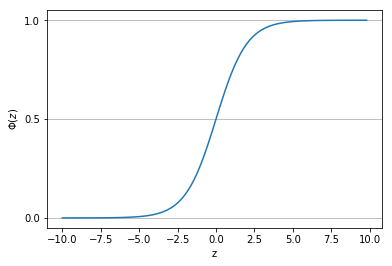

In [54]:
# ロジスティック関数をプロット
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.xlabel('z')
plt.ylabel('$\Phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.plot(x,sig)
plt.show()

特徴量xが重みwでパラメータ化されるとすれば、このシグモイド関数の出力は、サンプルがクラス１に属している確率$\Phi(z) = P(y=1|w; w)$であると解釈される。

例えば、あるサンプルに対して、$\Phi(z) =　0.8$が算出される場合は８０％の確率で正クラスに分類されることを示している。

あとは予測された確率を用いて、２つのクラスに分類するために変換をする。

$$ 分類値 =\begin{eqnarray}
\left\{
\begin{array}{l}
1\ \ (\Phi(z)\geq0.5) \\
0\ \ (\Phi(z) < 0.5)
\end{array}
\right.
\end{eqnarray}
$$

先のS字形のグラフと照合すると、これは以下と等価であることがわかる。

$$ 分類値 =\begin{eqnarray}
\left\{
\begin{array}{l}
1\ \ (z\geq0.0) \\
0\ \ (z < 0.0)
\end{array}
\right.
\end{eqnarray}
$$

実際のところ、多くのアプリケーションでは、予測されるクラスラベルに関心があるだけでなく、クラスの所属関係の確立を見積もることが役に立つ。

たとえば、気象予報において、雨が降るかどうかでなく、降水確率も発表するためにロジスティック回帰が使用される。

同様に、特定の症状に基づいて患者が疾患にかかっている確率を予想する目的でもしようできるため、ロジスティック回帰は医療分野でも広く利用されている。

それでは、ロジスティック回帰の目的関数を考えていきましょう。

まずは、理想の分類状態を考えます。
- y = 0 の時は$P(y=1|x)$が最大になって欲しい
- y = 0 の時は$P(y=0|x)$が最大になって欲しい

このようになると思います。

これを全てのデータセットについて考えます。
すると、目的関数は以下のような同時確率として考えることができる。

これを最大化するwを見つけることが目的となります。

$$L(w) = \prod^{n}_{i=1} P(y^{(i)}=1|x)^{y^{(i)}} P(y^{(i)}=0|x)^{1-y^{(i)}}$$

この式は以下の式と同義となります。

$$L(w) = \prod^{n}_{i=1} (\Phi(z^{(i)}))^{y^{(i)}} (1 - \Phi(z^{(i)}))^{1-y^{(i)}}$$

つまり全ての学習用データにおいて、正解ラベルと同じラベルに分類される確率が最大になるような同時確率を考えているということです。

同時確率が最も高くなるようなパラメータ wこそ、学習用データにフィットしていると言えます。
そういった、尤もらしいパラメータを求めます。
先ほど定義した関数は、尤度関数とも呼ばれている。

今からは、この尤度関数を最大化するための学習について勉強していく。

この尤度関数はそのままだと使いにくい。

まず、確率のかけ算なので０〜１の値のかけ算を繰り返すと、どんどん値が小さくなってしまう。

そして、かけ算は足し算に比べて計算がめんどくさいという点もある。


ですから、__尤度関数の対数__をとったもの（対数尤度関数）を最大化することにする。

$$Log L(w) = \sum^{n}_{i=0}[y^{(i)} log(\Phi(z^{(i)})) + (1 - y^{(i)}) log (1 - \Phi(z^{(i)}))]$$

これによって、勾配上昇法などの最適化アルゴリズムを用いて、この対数尤度関数を最大化できるようになった。

しかし、その代わりの方法として、前までに示してきたような勾配降下法を用いて最小化できるコスト関数Jとして対数尤度関数を書き直してみよう。

$Log L(w)$を最大化させる問題と、$- Log L(w)$を最小化することは全く同じです。

$$J(w) = - \sum^{n}_{i=0}[y^{(i)} log(\Phi(z^{(i)})) + (1 - y^{(i)}) log (1 - \Phi(z^{(i)}))]$$

以上が、ロジスティック回帰のコスト関数となる。

コスト関数が定義できれば、勾配降下法を用いて重みの更新式を導ける。

まずは、コスト関数を偏微分します。

$$ \frac{\partial }{\partial w_j} J(w) = - \Bigl(y \frac{1}{\Phi(z)} - (1 - y)\frac{1}{1-\Phi(z)} \Bigr)\frac{\partial}{\partial w_j}\Phi(z) $$

次に進む前に、シグモイド関数の偏導関数を計算してみる。

$$ \frac{\partial }{\partial z} \Phi(z) = \frac{1}{(1+ e^{(-z)})}e^{-z}=\frac{1}{1+e^{-z}}\Bigl(1 - \frac{1}{1+e^{-z}}\Bigr)=\Phi(z)(1-\Phi(z))$$ 

上記の２つの式より、

$$ \frac{\partial }{\partial w_j} J(w) = - \Bigl(y \frac{1}{\Phi(z)} - (1 - y)\frac{1}{1-\Phi(z)} \Bigr)\Phi(z)(1-\Phi(z))\frac{\partial}{\partial w_j}z$$

$$=- \bigl(y(1-\Phi(z)) - (1-y)\Phi(z)\bigr)x_j$$

$$=-\bigl(y-\Phi(z)\bigr)x_j$$

以上から、下記の更新規則が導き出せる。

$$w_j := w_j - \alpha\sum^{n}_{i=1}\bigl(y-\Phi(z)\bigr)x_j$$

理論分野は以上になる。

これからは実際に、Irisデータセットを使って、ロジスティック回帰を実行していく。

##### Irisデータセットの読み込み

In [55]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [56]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
scaler.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)

In [58]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

### scikit-learnのロジスティック回帰で実践

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

テストデータで、スコアを算出

In [60]:
lr.score(X_test_std, y_test)

0.97777777777777775

#### 結果をプロット

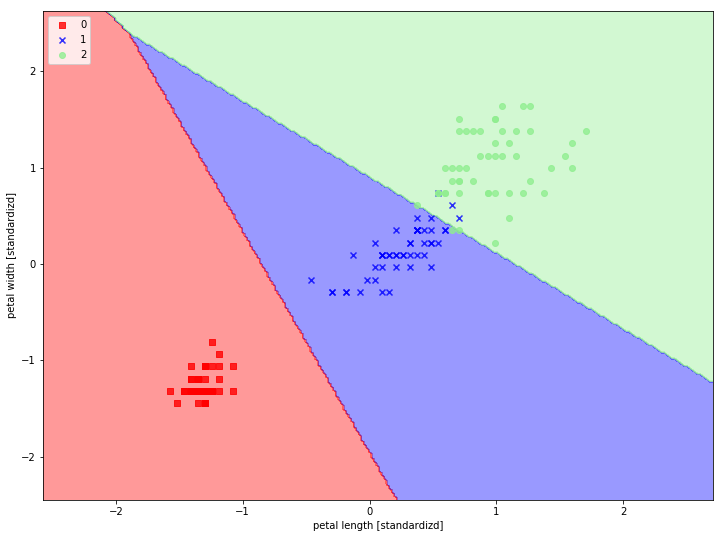

In [61]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(12, 9))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")

plt.legend(loc = "upper left")
plt.show()

図を見て分かるように、前回のパーセプトロンと比べると圧倒的に分類精度が良いことが分かります。

ここからは、

~~~
lr = LogisticRegression(C=1000.0, random_state=0)
~~~

上記の引数のCについて勉強する。

まず、過学習と汎化性能のトレードオフを探す方法の一つとして、正則化に基づいて複雑さを調整することがあげられる。

vol.3で学習したように、ロジスティック回帰にも正則化項を導入することによって、極端なパラメータの重みにペナルティを科す。

以下で定義される、L2正則化を追加する。

$$ \frac{\lambda }{2} ||w||^2 = \frac{\lambda }{2}\sum^{m}_{j=1} w^2_j$$

この場合、$\lambda$はいわゆる正則化パラメータである。

よって正則化を追加したロジスティック回帰は以下のようになる。

$$J(w) = - \sum^{n}_{i=0}[y^{(i)} log(\Phi(z^{(i)})) + (1 - y^{(i)}) log (1 - \Phi(z^{(i)}))] + \frac{\lambda }{2} ||w||^2$$

__正則化パラメータ$\lambda$を使用することで、重みを小さく保ちながらトレーニングデータセットをどの程度適合させるかを制御できる。__

__正則化の強さを高めるには、$\lambda$の値を大きく__する。

scikit-learnのLogisticRegressionクラスに実装されているパラメータCは、慣習により正則化パラメータの逆数となっている。

$$ C = \frac{1}{\lambda} $$

したがって、ロジスティック回帰の正則化されたコスト関数は以下のように記述できる。

$$J(w) = - C \sum^{n}_{i=0}[y^{(i)} log(\Phi(z^{(i)})) + (1 - y^{(i)}) log (1 - \Phi(z^{(i)}))] + \frac{1}{2} ||w||^2$$

要するに、__逆正則化パラメータCの値を減らすことは、正則化の強さを高めることを意味__する。

正則化の強さを可視化するには、２つの重み係数と逆正則化パラメータとの関係をプロットすればいい。

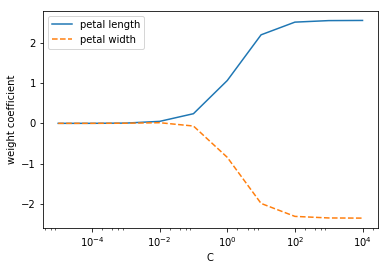

In [62]:
# グラフのプロット
weigth, params = [], []
for i in range(-5, 5):
    c = 10 ** i
    lr = LogisticRegression(C=c, random_state=0)
    lr.fit(X_train_std, y_train)
    weigth.append(lr.coef_[1])
    params.append(c)
    
weigth = np.array(weigth)
plt.plot(params, weigth[:, 0], label='petal length')
plt.plot(params, weigth[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')

plt.xscale('log')
plt.show()

図から分かるように、パラメータCが減少し、正則化の強さが増すと、重み係数が０に近づいていく。